# Question A.1

For finding the "right" number of clusters we will rely on the Shilhoutte score. We will use k-means (you can use hierarchical clustering as in the example online as well) and for different numbers of clusters we will calculate the average silhouette value. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

dataset = pd.read_csv("movies.csv")

In [2]:
silhouette = []
for n_clusters in range(2,21):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(dataset)
    silhouette.append(silhouette_score(dataset,kmeans.labels_))

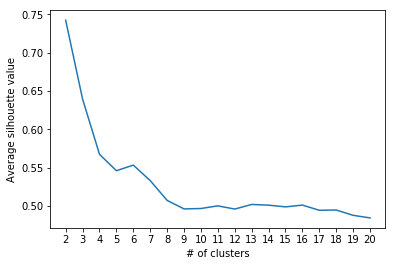

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(range(2,21),silhouette)
ax.set_xlabel('# of clusters')
ax.set_ylabel('Average silhouette value')
plt.xticks(np.arange(2, 21, step=1))
plt.show()

It seems that with 2 clusters we obtain the highest average silhouette value. 

# Question A.2

We repeat the same process but first we scale the data 

In [7]:
dataset_scaled = preprocessing.normalize(dataset)
silhouette_scaled = []
for n_clusters in range(2,21):
    kmeans_scaled = KMeans(n_clusters=n_clusters, random_state=0).fit(dataset_scaled)
    silhouette_scaled.append(silhouette_score(dataset_scaled,kmeans_scaled.labels_))

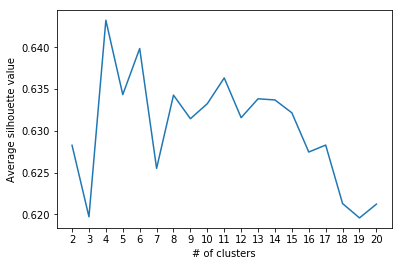

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(range(2,21),silhouette_scaled)
ax.set_xlabel('# of clusters')
ax.set_ylabel('Average silhouette value')
plt.xticks(np.arange(2, 21, step=1))
plt.show()

When the data are scaled they are "best" separated when using 4 clusters

# Question A.3

The data have 5 dimensions. So in order to visualize them we need to reduce the dimensionality to 2. We can use PCA and keep the first two components, which will be the new coordinates for each data point. 

In [9]:
dataset_std = StandardScaler().fit_transform(dataset)

sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(dataset_std)
    
print("The variance explained by the two first principal components is: ", sum(sklearn_pca.explained_variance_ratio_))

The variance explained by the two first principal components is:  0.7459296789923455


In [10]:
# build the clustering with 2 clusters again - which was the "optimal" according to silhouette
kmeans_2 = KMeans(n_clusters=2, random_state=0).fit(dataset)

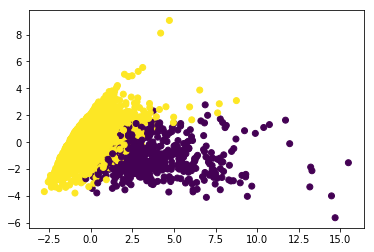

In [11]:
plt.scatter(x=Y_sklearn[:,0],y=Y_sklearn[:,1],c=kmeans_2.labels_)

We can observe fairly good separability even though there is an overlap for the clusters. This overlap exists since the first two components capture only 74% of the variance in the data. 

# Problem B

While this problem can be solved analytically, the easiest approach is through Monte Carlo simulations. We can simulate several times the possible arrangements of the 4 parked cars in the 6 curb spots when we arrive. For each case we can etimate the need of parallel parking by checking whether the last spot is open or there are two consecutive spots open. 

In [9]:
curb = ['0','0','1','1','1','1'] # each element of the array corresponds to one spot; '1' corresponds to a taken spot and '0' to an empty
sim_n = 10000
par_parking = []

for _ in range(sim_n):
    curb = list(np.random.permutation(np.array(curb)))
    if curb[-1] == '0' or '00' in "".join(curb):
        par_parking.append(0)
    else:
        par_parking.append(1)

In [12]:
print("The probability of having to parallel park is:",sum(par_parking)/sim_n)

The probability of having to parallel park is: 0.3993
